In [1]:
import pandas as pd

In [2]:
filepath = "D:/MerchantChurnPrediction/DataSet/Online Retail.xlsx"

df = pd.read_excel(filepath)

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df.drop('Description', axis=1, inplace=True)

In [7]:
df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0,France


In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Quantity     406829 non-null  int64         
 3   InvoiceDate  406829 non-null  datetime64[ns]
 4   UnitPrice    406829 non-null  float64       
 5   CustomerID   406829 non-null  float64       
 6   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 24.8+ MB


Defining Churn:

A merchant is churned if they have no transactions in the last 30 days of the dataset.

What we are assuming

The dataset represents transaction activity on a payment platform (proxy for Razorpay).

Each CustomerID is treated as a business/merchant using that platform.

InvoiceDate represents points in time when that merchant was active (processed payments).

latest_date is the cut-off date up to which the data was extracted.

churn = 1 if days > 30

churn = 0 if days < 30

In [12]:
latest_date = df['InvoiceDate'].max()
latest_date

Timestamp('2011-12-09 12:50:00')

In [13]:
latest_date_per_merchant = df.groupby('CustomerID')['InvoiceDate'].max()

In [14]:
latest_date_per_merchant

# We're referencing the invoice date with the customer id, here we're assuming that despite the 
# customer being a business or a customer he/she is using razorpay to make its payment to the business.

CustomerID
12346.0   2011-01-18 10:17:00
12347.0   2011-12-07 15:52:00
12348.0   2011-09-25 13:13:00
12349.0   2011-11-21 09:51:00
12350.0   2011-02-02 16:01:00
                  ...        
18280.0   2011-03-07 09:52:00
18281.0   2011-06-12 10:53:00
18282.0   2011-12-02 11:43:00
18283.0   2011-12-06 12:02:00
18287.0   2011-10-28 09:29:00
Name: InvoiceDate, Length: 4372, dtype: datetime64[ns]

In [15]:
latest_date_per_merchant.info()

<class 'pandas.core.series.Series'>
Index: 4372 entries, 12346.0 to 18287.0
Series name: InvoiceDate
Non-Null Count  Dtype         
--------------  -----         
4372 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 68.3 KB


In [16]:
time_delta = latest_date - latest_date_per_merchant

time_delta

CustomerID
12346.0   325 days 02:33:00
12347.0     1 days 20:58:00
12348.0    74 days 23:37:00
12349.0    18 days 02:59:00
12350.0   309 days 20:49:00
                 ...       
18280.0   277 days 02:58:00
18281.0   180 days 01:57:00
18282.0     7 days 01:07:00
18283.0     3 days 00:48:00
18287.0    42 days 03:21:00
Name: InvoiceDate, Length: 4372, dtype: timedelta64[ns]

In [17]:
churn = (time_delta.dt.days > 30).astype(int)

churn

CustomerID
12346.0    1
12347.0    0
12348.0    1
12349.0    0
12350.0    1
          ..
18280.0    1
18281.0    1
18282.0    0
18283.0    0
18287.0    1
Name: InvoiceDate, Length: 4372, dtype: int32

In [18]:
per_merchant_churn_table = pd.DataFrame({
    "InactivityDays": time_delta.dt.days,
    "Churn": churn
})

per_merchant_churn_table.head()

,InactivityDays,Churn
CustomerID,,
12346.0,325,1
12347.0,1,0
12348.0,74,1
12349.0,18,0
12350.0,309,1


In [19]:
# Sanity Check
per_merchant_churn_table['Churn'].value_counts()

Churn
1    2630
0    1742
Name: count, dtype: int64

In [20]:
# Sanity Check Again
per_merchant_churn_table["Churn"].value_counts(normalize=True)

Churn
1    0.601555
0    0.398445
Name: proportion, dtype: float64

Deciding which past data is allowed to be used as features to predict churn.
Features must come from the past, not from the churn window.

Features describe how a merchant behaved before we decide if they churned.

Examples:

Number of transactions

Average transaction value

Days since last transaction

Trend in activity (up/down)

What “past data” means

“Past data” means:

Transaction history before the churn decision point

Data that would realistically be available at prediction time

In our setup:

Last 30 days → used only to decide churn

Before that → safe to use as features

So “past data” = transactions outside the churn window.

Windows

Churn window:
T − 30 days → T
→ used only to label churn (already done)

Observation window (features):
T − 120 days → T − 30 days
(i.e., 90 days of behavior)

In [21]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [22]:
latest_date

Timestamp('2011-12-09 12:50:00')

In [23]:
# Filter transactions before churn off start period: latest_date - 30 days

cutoff_date = latest_date - pd.Timedelta(days=30)

print(cutoff_date)


2011-11-09 12:50:00


In [24]:
start_date = latest_date - pd.Timedelta(days=120)

print(start_date)

2011-08-11 12:50:00


In [25]:
obs_df = df[(df['InvoiceDate'] >= start_date) & (df['InvoiceDate'] <= cutoff_date)]

obs_df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
298384,563018,16169E,25,2011-08-11 12:53:00,0.42,13427.0,United Kingdom
298385,563018,23263,12,2011-08-11 12:53:00,1.25,13427.0,United Kingdom
298386,563018,23546,25,2011-08-11 12:53:00,0.42,13427.0,United Kingdom
298387,563018,23547,25,2011-08-11 12:53:00,0.42,13427.0,United Kingdom
298388,563018,22178,24,2011-08-11 12:53:00,1.25,13427.0,United Kingdom


Turn the 90-day observation window (obs_df) into numerical features per merchant that summarize behavior.

Core feature groups

Per merchant (CustomerID)

1. Transaction frequency (TxFreq)

txn_count_90d
→ How many transactions in the last 90 days

2️. Monetary value

total_txn_value_90d (TotalTx90)
→ Total value of transactions

avg_txn_value_90d (AvgTx90)
→ Average transaction value

3. Recency (within observation window) 

recency_days
→ Days since the merchant’s last transaction before cutoff

In [26]:
obs_df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
298384,563018,16169E,25,2011-08-11 12:53:00,0.42,13427.0,United Kingdom
298385,563018,23263,12,2011-08-11 12:53:00,1.25,13427.0,United Kingdom
298386,563018,23546,25,2011-08-11 12:53:00,0.42,13427.0,United Kingdom
298387,563018,23547,25,2011-08-11 12:53:00,0.42,13427.0,United Kingdom
298388,563018,22178,24,2011-08-11 12:53:00,1.25,13427.0,United Kingdom
...,...,...,...,...,...,...,...
452020,575312,22083,6,2011-11-09 12:49:00,2.95,13588.0,United Kingdom
452021,575312,23355,4,2011-11-09 12:49:00,4.95,13588.0,United Kingdom
452022,575312,22110,6,2011-11-09 12:49:00,2.55,13588.0,United Kingdom
452023,575312,22037,12,2011-11-09 12:49:00,0.42,13588.0,United Kingdom


In [27]:
# Tx Frequency

tx90 = obs_df.groupby('CustomerID')['InvoiceNo'].nunique()

tx90.value_counts()

InvoiceNo
1     1317
2      598
3      267
4      147
5       98
6       60
7       38
8       15
9       14
10      10
11       8
12       8
13       3
15       3
24       3
14       2
29       2
26       2
19       1
21       1
90       1
25       1
48       1
16       1
53       1
17       1
30       1
Name: count, dtype: int64

In [28]:
obs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125737 entries, 298384 to 452024
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    125737 non-null  object        
 1   StockCode    125737 non-null  object        
 2   Quantity     125737 non-null  int64         
 3   InvoiceDate  125737 non-null  datetime64[ns]
 4   UnitPrice    125737 non-null  float64       
 5   CustomerID   125737 non-null  float64       
 6   Country      125737 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 7.7+ MB


In [29]:
#  Monetary Value - total value of txs

obs_df['TotalPrice'] = obs_df['Quantity'] * obs_df['UnitPrice']

obs_df.head()

C:\Users\gamef\AppData\Local\Temp\ipykernel_8284\2662274485.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs_df['TotalPrice'] = obs_df['Quantity'] * obs_df['UnitPrice']


,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
298384,563018,16169E,25,2011-08-11 12:53:00,0.42,13427.0,United Kingdom,10.5
298385,563018,23263,12,2011-08-11 12:53:00,1.25,13427.0,United Kingdom,15.0
298386,563018,23546,25,2011-08-11 12:53:00,0.42,13427.0,United Kingdom,10.5
298387,563018,23547,25,2011-08-11 12:53:00,0.42,13427.0,United Kingdom,10.5
298388,563018,22178,24,2011-08-11 12:53:00,1.25,13427.0,United Kingdom,30.0


In [30]:
total_value_90 = obs_df.groupby('CustomerID')['TotalPrice'].sum()

total_value_90

CustomerID
12347.0    1294.32
12348.0     310.00
12352.0     944.23
12357.0    6207.67
12359.0    2876.85
            ...   
18276.0     335.86
18277.0     110.38
18278.0     173.90
18283.0     249.55
18287.0    1072.00
Name: TotalPrice, Length: 2604, dtype: float64

In [31]:
# Avg Tx Value
avg_value_90 = (obs_df.groupby(
    ['CustomerID', 'InvoiceNo'])['TotalPrice']
    .sum()
    .groupby('CustomerID')
    .mean()
)
avg_value_90

CustomerID
12347.0    1294.320000
12348.0     310.000000
12352.0     314.743333
12357.0    6207.670000
12359.0    2876.850000
              ...     
18276.0     335.860000
18277.0     110.380000
18278.0     173.900000
18283.0     124.775000
18287.0     536.000000
Name: TotalPrice, Length: 2604, dtype: float64

In [32]:
# recency_days
# Days since the merchant’s last transaction before cutoff

recency_days = (
    obs_df
    .groupby('CustomerID')['InvoiceDate']
    .max()
    .apply(lambda x: (cutoff_date - x).days)
)

recency_days

CustomerID
12347.0     9
12348.0    44
12352.0     5
12357.0     2
12359.0    27
           ..
18276.0    13
18277.0    27
18278.0    43
18283.0    12
18287.0    12
Name: InvoiceDate, Length: 2604, dtype: int64

In [33]:
# Assembing into one Feature df

feature_df = pd.DataFrame({
    "TxFreq": tx90,
    "TotalTx90": total_value_90,
    "AvgTx90": avg_value_90,
    "Recency": recency_days
})

feature_df.head()

,TxFreq,TotalTx90,AvgTx90,Recency
CustomerID,,,,
12347.0,1,1294.32,1294.320000,9
12348.0,1,310.00,310.000000,44
12352.0,3,944.23,314.743333,5
12357.0,1,6207.67,6207.670000,2
12359.0,1,2876.85,2876.850000,27


In [34]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2604 entries, 12347.0 to 18287.0
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TxFreq     2604 non-null   int64  
 1   TotalTx90  2604 non-null   float64
 2   AvgTx90    2604 non-null   float64
 3   Recency    2604 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 101.7 KB


In [35]:
feature_df = feature_df.reset_index()

feature_df

,CustomerID,TxFreq,TotalTx90,AvgTx90,Recency
0,12347.0,1,1294.32,1294.320000,9
1,12348.0,1,310.00,310.000000,44
2,12352.0,3,944.23,314.743333,5
3,12357.0,1,6207.67,6207.670000,2
4,12359.0,1,2876.85,2876.850000,27
...,...,...,...,...,...
2599,18276.0,1,335.86,335.860000,13
2600,18277.0,1,110.38,110.380000,27
2601,18278.0,1,173.90,173.900000,43
2602,18283.0,2,249.55,124.775000,12


In [36]:
per_merchant_churn_table = per_merchant_churn_table.reset_index()

per_merchant_churn_table

,CustomerID,InactivityDays,Churn
0,12346.0,325,1
1,12347.0,1,0
2,12348.0,74,1
3,12349.0,18,0
4,12350.0,309,1
...,...,...,...
4367,18280.0,277,1
4368,18281.0,180,1
4369,18282.0,7,0
4370,18283.0,3,0


Upon checking the 2 dfs side by side, the index (customerID) for both tables don't match.

This is expected because

per_merchant_churn_table
→ Built from the entire dataset
→ Contains all merchants (4,372)

feature_df
→ Built from the 90-day observation window (obs_df)
→ Contains only merchants who had at least one transaction in that 90-day window (2,604)

Merchants with:

No transactions in the observation window
→ have no behavioral signal
→ must be excluded from modeling

In [37]:
# Merging feature_df and per_merchant_churn_table

model_df = pd.merge(feature_df, per_merchant_churn_table, on="CustomerID", how="inner")

model_df

,CustomerID,TxFreq,TotalTx90,AvgTx90,Recency,InactivityDays,Churn
0,12347.0,1,1294.32,1294.320000,9,1,0
1,12348.0,1,310.00,310.000000,44,74,1
2,12352.0,3,944.23,314.743333,5,35,1
3,12357.0,1,6207.67,6207.670000,2,32,1
4,12359.0,1,2876.85,2876.850000,27,7,0
...,...,...,...,...,...,...,...
2599,18276.0,1,335.86,335.860000,13,20,0
2600,18277.0,1,110.38,110.380000,27,57,1
2601,18278.0,1,173.90,173.900000,43,73,1
2602,18283.0,2,249.55,124.775000,12,3,0


In [38]:
model_df.drop(columns="InactivityDays", axis=1, inplace=True)

model_df

,CustomerID,TxFreq,TotalTx90,AvgTx90,Recency,Churn
0,12347.0,1,1294.32,1294.320000,9,0
1,12348.0,1,310.00,310.000000,44,1
2,12352.0,3,944.23,314.743333,5,1
3,12357.0,1,6207.67,6207.670000,2,1
4,12359.0,1,2876.85,2876.850000,27,0
...,...,...,...,...,...,...
2599,18276.0,1,335.86,335.860000,13,0
2600,18277.0,1,110.38,110.380000,27,1
2601,18278.0,1,173.90,173.900000,43,1
2602,18283.0,2,249.55,124.775000,12,0


Baseline Modelling

- Target(y) - Churn

- Features(x) - TxFreq, TotalTx90, AvgTx90, Recency

What does imbalanced mean?

Target (Churn) does not have equal numbers of 0s and 1s.

Here: 

~60% churned (1)

~40% not churned (0)

In [39]:
X = model_df.drop(columns=['Churn', 'CustomerID'], axis= 1)

In [40]:
y = model_df['Churn']

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

log_reg_baseline = LogisticRegression(random_state=42)

model = log_reg_baseline.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_prob = model.predict_proba(X_test)[:, 1]

In [43]:
print(classification_report(y_test, y_pred))
print('-------------------------------')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('-------------------------------')


print(roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.68      0.40      0.50       240
           1       0.62      0.84      0.71       281

    accuracy                           0.64       521
   macro avg       0.65      0.62      0.61       521
weighted avg       0.65      0.64      0.62       521

-------------------------------
Confusion Matrix
[[ 96 144]
 [ 45 236]]
-------------------------------
0.6751334519572953


Metrics Interpretation

- Priortizing Recall here since we want to minimise false negatives. 
- From a business standpoint, I'd like to identify any merchants who'd be churned and prevent them from going away.
- Recall 0.84 - means we are able to identify 84% of the merchants who actually churned.
- At the same time Precision is low at 0.62 with False Positives being 144, meaning the model incorrectly flagged 144 merchants who aren't churned as churned.
- Raising the decision threshold could reduce false positives, but this would increase false negatives and lower recall.
- This will affect business cost as in order to prevent them from going, we'll roll out discounts/attractive offers to retain wherein they weren't going any where at all.
- F1 Score is 0.71 indicates a reasonable balance between precision and recall, especially given recall is prioritized.
- ROC~AUC 0.67 indicates that the model has meaningful discriminative power and can rank churned merchants above non-churned ones better than random, making it suitable as a baseline model.

Improving Metrics and Models

- Handle class imbalance → class_weight='balanced'


In [44]:
log_reg_balanced = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    random_state=42)

balanced_model = log_reg_balanced.fit(X_train, y_train)
y_pred_bal = balanced_model.predict(X_test)

y_prob_bal = log_reg_balanced.predict_proba(X_test)[:, 1]

In [45]:
print(classification_report(y_test, y_pred_bal))
print('-------------------------------')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_bal))
print('-------------------------------')
print("ROC-AUC:", roc_auc_score(y_test, y_prob_bal))

              precision    recall  f1-score   support

           0       0.64      0.50      0.57       240
           1       0.64      0.76      0.70       281

    accuracy                           0.64       521
   macro avg       0.64      0.63      0.63       521
weighted avg       0.64      0.64      0.64       521

-------------------------------
Confusion Matrix
[[121 119]
 [ 67 214]]
-------------------------------
ROC-AUC: 0.6756227758007116


Compairing Metrics for Baseline Vs Balanced Model

In [46]:
base_clf_report = classification_report(y_test, y_pred, output_dict=True)
print(base_clf_report)
print("---------------------")

balanced_clf_report = classification_report(y_test, y_pred_bal, output_dict=True)
print(balanced_clf_report)

{'0': {'precision': 0.6808510638297872, 'recall': 0.4, 'f1-score': 0.5039370078740157, 'support': 240.0}, '1': {'precision': 0.6210526315789474, 'recall': 0.8398576512455516, 'f1-score': 0.7140695915279879, 'support': 281.0}, 'accuracy': 0.6372360844529751, 'macro avg': {'precision': 0.6509518477043673, 'recall': 0.6199288256227757, 'f1-score': 0.6090032997010018, 'support': 521.0}, 'weighted avg': {'precision': 0.6485989343432499, 'recall': 0.6372360844529751, 'f1-score': 0.6172714723783654, 'support': 521.0}}
---------------------
{'0': {'precision': 0.6436170212765957, 'recall': 0.5041666666666667, 'f1-score': 0.5654205607476636, 'support': 240.0}, '1': {'precision': 0.6426426426426426, 'recall': 0.7615658362989324, 'f1-score': 0.6970684039087948, 'support': 281.0}, 'accuracy': 0.6429942418426103, 'macro avg': {'precision': 0.6431298319596191, 'recall': 0.6328662514827995, 'f1-score': 0.6312444823282292, 'support': 521.0}, 'weighted avg': {'precision': 0.6430914926851545, 'recall': 

In [47]:
baseline_precision = base_clf_report['1']['precision']
baseline_recall = base_clf_report['1']['recall']
baseline_f1 = base_clf_report['1']['f1-score']
baseline_roc_auc = roc_auc_score(y_test, y_prob)

balanced_precision = balanced_clf_report['1']['precision']
balanced_recall = balanced_clf_report['1']['recall']
balanced_f1 = balanced_clf_report['1']['f1-score']
balanced_roc_auc = roc_auc_score(y_test, y_prob_bal)


metrics_df = pd.DataFrame({
    "ChurnMetric": ["Precision", "Recall", "F1", "ROC-AUC"],
    "Baseline": [baseline_precision, baseline_recall, baseline_f1, baseline_roc_auc],
    "Balanced": [balanced_precision, balanced_recall, balanced_f1, balanced_roc_auc]
})

metrics_df.set_index("ChurnMetric", inplace=True)

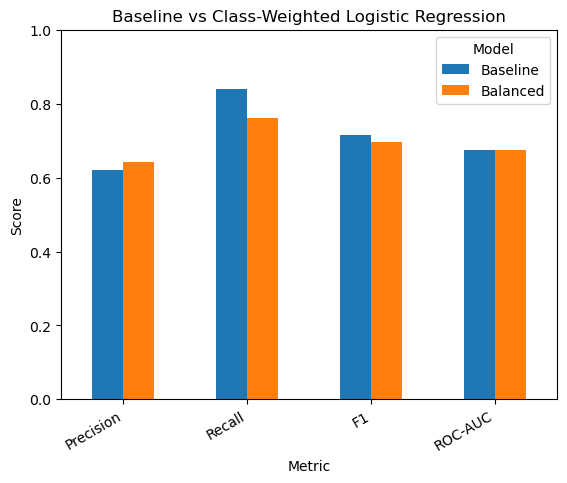

In [48]:
import matplotlib.pyplot as plt

metrics_df.plot(kind='bar')

plt.title("Baseline vs Class-Weighted Logistic Regression")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.xticks(rotation=30, ha='right')
plt.ylim(0,1)

plt.legend(title="Model")
plt.show()

Compairing the 2 Models visually and Final Model Selection


- The baseline model seems to be performing better on Recall and F1. While the weighted model performs better on Precision. 
- ROC-AUC remain similar for both the models.

- Although class weighting improved precision, it reduced recall and F1 for the churn class. Since the primary business objective is to minimise false negatives, the baseline model better satisfies this requirement and is therefore selected for deployment.”

#### Baseline Logistic Regression Selected

In [49]:
import joblib 

joblib.dump(model, "artifacts/churn_model.pkl")

['artifacts/churn_model.pkl']

In [51]:
feature_names = X_train.columns.tolist()

joblib.dump(feature_names, "artifacts/feature_names.pkl")

['artifacts/feature_names.pkl']